In [245]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import random
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.inspection import permutation_importance


# Titanic Kaggle Competition

## Load Data

In [14]:
# Load in original datasets
df_train_orig = pd.read_csv('data/train.csv')
df_test_orig = pd.read_csv('data/test.csv')

display(df_train_orig)
display(df_test_orig)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S




## Examine Data

### Describe Data

In [15]:
# Describe Data

print(f'\n* Number of labels: {df_train_orig.shape[1]}, which are:')

for col in df_train_orig.columns:
    print(
        f'{col:15s} with examples: {df_train_orig[col][0]}, {df_train_orig[col][1]}, {df_train_orig[col][2]}')

print('\n* The "describe" of the data is:')

display(df_train_orig.describe())

print(f'\n* The number of passengers is {df_train_orig.shape[0]}')

print(f'\n* The number of nans in the data are:')

display(df_train_orig.isna().sum())
display(df_test_orig.isna().sum())



* Number of labels: 12, which are:
PassengerId     with examples: 1, 2, 3
Survived        with examples: 0, 1, 1
Pclass          with examples: 3, 1, 3
Name            with examples: Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkinen, Miss. Laina
Sex             with examples: male, female, female
Age             with examples: 22.0, 38.0, 26.0
SibSp           with examples: 1, 1, 0
Parch           with examples: 0, 0, 0
Ticket          with examples: A/5 21171, PC 17599, STON/O2. 3101282
Fare            with examples: 7.25, 71.2833, 7.925
Cabin           with examples: nan, C85, nan
Embarked        with examples: S, C, S

* The "describe" of the data is:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



* The number of passengers is 891

* The number of nans in the data are:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
df_train_orig['Ticket'].values


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'CA 2144', 'S.O.C. 14879', '2680', '1601', '348123', '349208',
       '374746', '248738', '364516', '345767', '345779', '330932',
       '113059',

#### Interesting observaitions from describe

Most of the cabin entries are nans, about 80%. Many of the ages, about 20%, are nans. Fortunatley (see below), there are correlations between age and sex+class so we can set the nans to the mean grouping by sex+class. Probably should get rid of cabin. 

### Plot Data

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

<Figure size 640x480 with 0 Axes>

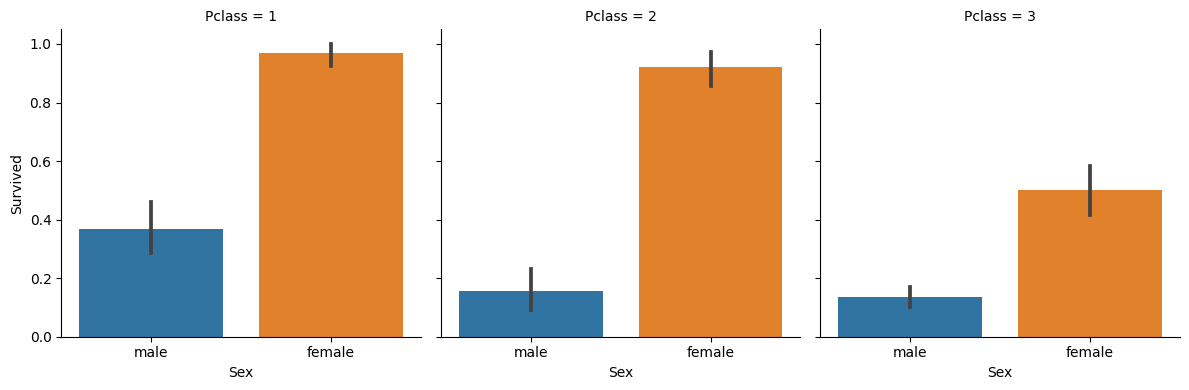

In [17]:
# Sex

plt.figure()
sns.catplot(
    data=df_train_orig, x="Sex", y="Survived", col="Pclass",
    kind="bar", height=4,
)
display(df_train_orig.groupby(['Sex', 'Pclass'])['Survived'].mean())


#### Interesting Observations on Sex

Males typically did not survive except in first class (nearly 40% 1st class versus about 15% others).  Most females survived (> 90%), except third class which was about 50%.

count       mean        std    min    25%    50%    75%   max
Survived Pclass                                                               
0        1        64.0  43.695312  15.284243   2.00  31.00  45.25  55.25  71.0
         2        90.0  33.544444  12.151581  16.00  25.00  30.50  39.00  70.0
         3       270.0  26.555556  12.334882   1.00  19.00  25.00  33.00  74.0
1        1       122.0  35.368197  13.760017   0.92  24.25  35.00  45.00  80.0
         2        83.0  25.901566  14.837787   0.67  17.50  28.00  34.00  62.0
         3        85.0  20.646118  11.995047   0.42  14.00  22.00  29.00  63.0

count       mean        std   min    25%   50%    75%   max
Survived Sex                                                                
0        female   64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         male    360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        female  197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         male     93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

<Figure size 640x480 with 0 Axes>

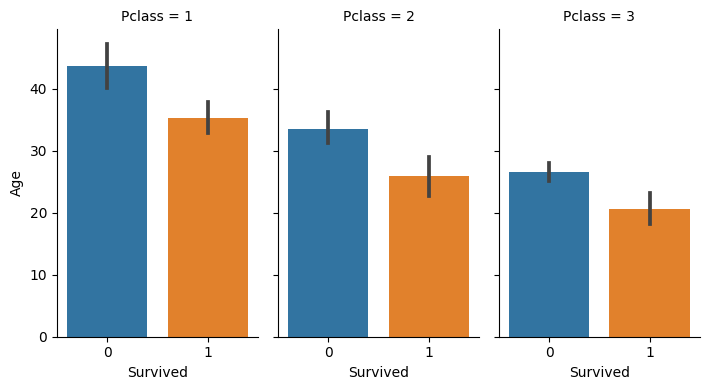

<Figure size 640x480 with 0 Axes>

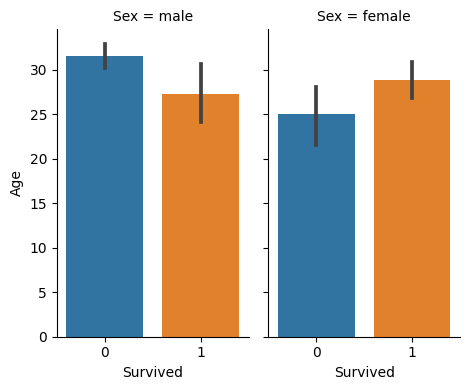

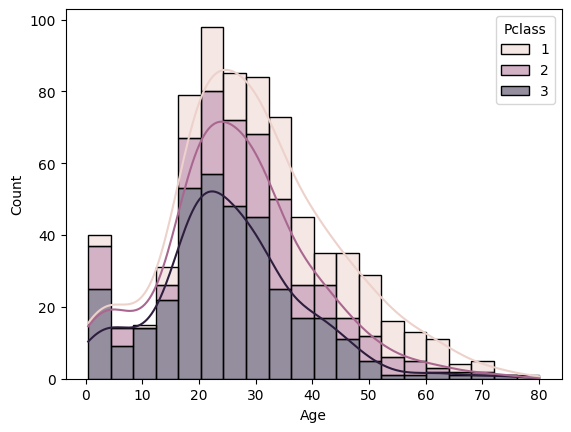

In [18]:
# Age


# Age 1
plt.figure()
sns.catplot(
    data=df_train_orig, x="Survived", y="Age", col="Pclass",
    kind="bar", height=4, aspect=.6,
)

# Age 1
plt.figure()
sns.catplot(
    data=df_train_orig, x="Survived", y="Age", col="Sex",
    kind="bar", height=4, aspect=.6,
)

# Age 2
plt.figure()
sns.histplot(data=df_train_orig, x='Age',
             hue='Pclass', kde=True, multiple="stack")


display(df_train_orig.groupby(['Survived', 'Pclass'])['Age'].describe())

display(df_train_orig.groupby(['Survived', 'Sex'])['Age'].describe())


# display(df_train_orig.groupby(['Survived','Pclass'])['Age'].mean());

# display(df_train_orig.groupby(['Survived','Sex'])['Age'].mean());


#### Interesting observations on Age

Most people were in there 20s and 30s.  Overall, younger men were more likely to survive than older men, whereas older women were more likely than younger. However, once normalizing for class one sees younger people typically survieved.  (Just so many first class women survived, who were older, the average is high among survivers. But among each class including 1st, younger survived)

The story so far: be a women, be in first class, and be on the younger side. Each gives you an advantage, with being female and in first class the highest. 

count      mean       std  min  25%  50%  75%  max
Sex    Pclass                                                    
female 1        94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0
       2        76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0
       3       144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0
male   1       122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0
       2       108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0
       3       347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0

<Figure size 640x480 with 0 Axes>

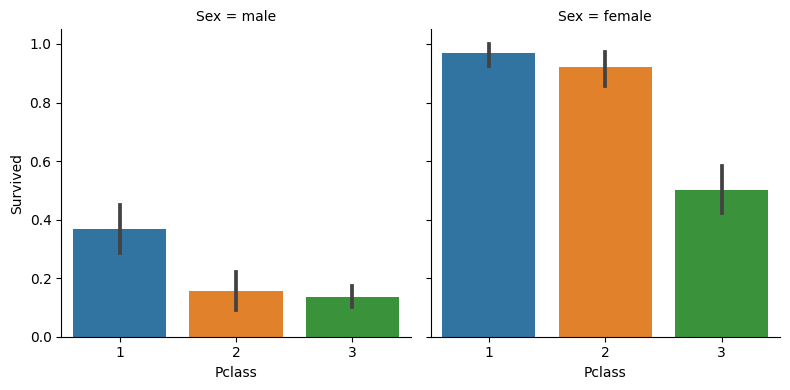

In [19]:
plt.figure()
sns.catplot(
    data=df_train_orig, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4
)

display(df_train_orig.groupby(['Sex', 'Pclass'])['Survived'].describe())


#### Interesting observations on Pclass

Just to reiterate, females in 1st and 2nd class largely survived (over 90%) while 3rd class was 50%.  Men only survived in first class for the most part but even then wasn't as much as any women. (40% 1st and 15% 2nd and 3rd)


count      mean       std  min  25%  50%  75%  max
Sex    Survived                                                    
female 0          81.0  1.209877  1.814635  0.0  0.0  1.0  1.0  8.0
       1         233.0  0.515021  0.737533  0.0  0.0  0.0  1.0  4.0
male   0         468.0  0.440171  1.138507  0.0  0.0  0.0  0.0  8.0
       1         109.0  0.385321  0.636952  0.0  0.0  0.0  1.0  4.0

<Figure size 640x480 with 0 Axes>

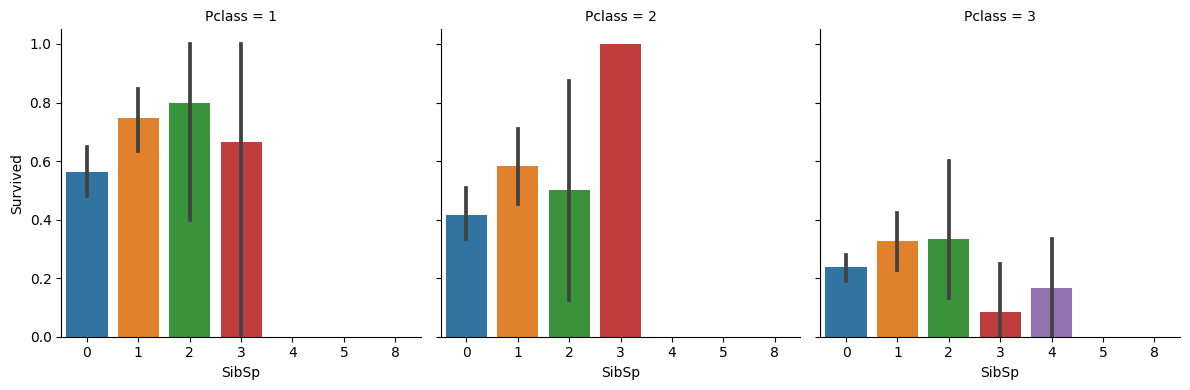

In [20]:
# SibSp
# df_train_orig['SibSp'].hist(by=df_train_orig['Survived'],bins=20,legend=True);
plt.figure()
sns.catplot(
    data=df_train_orig, x="SibSp", y="Survived", col="Pclass",
    kind="bar", height=4
)

display(df_train_orig.groupby(['Sex', 'Survived'])['SibSp'].describe())


#### Interesting observations on SibSp

I can't find any firm conclusions. It seems like maybe it's best to have a few siblings?  Too many is bad?  But zero isn't that must worse so I can't say for sure.


<Figure size 640x480 with 0 Axes>

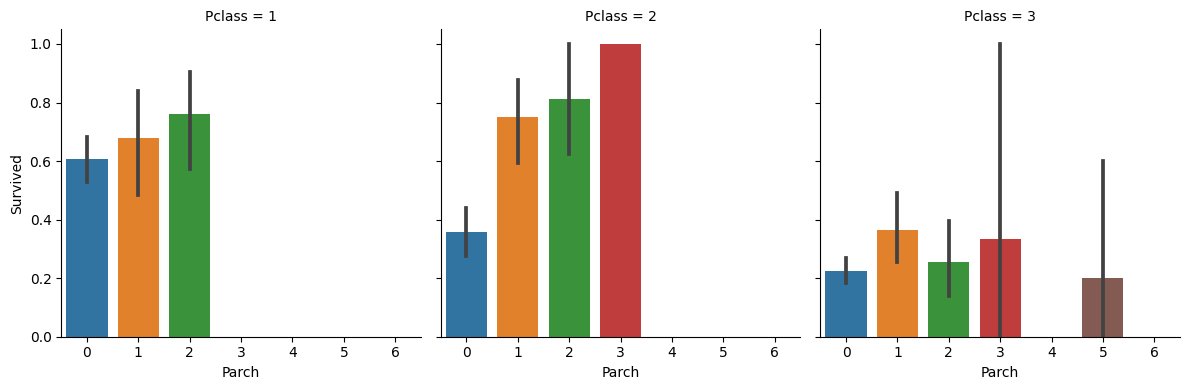

In [21]:
# SibSp
# df_train_orig['SibSp'].hist(by=df_train_orig['Survived'],bins=20,legend=True);
plt.figure()
sns.catplot(
    data=df_train_orig, x="Parch", y="Survived", col="Pclass",
    kind="bar", height=4
)


#### Interesting observations on Parch

Like Sibsp, I can't say for sure. 


<Figure size 640x480 with 0 Axes>

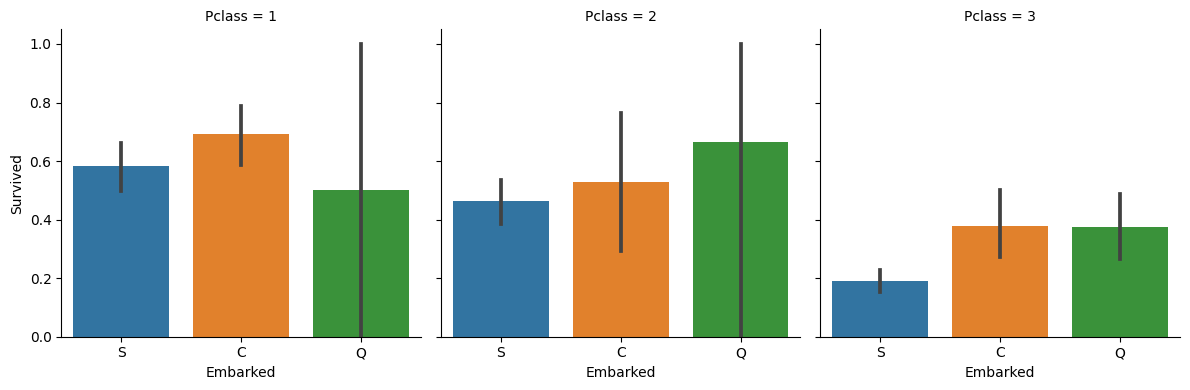

In [22]:
# SibSp
# df_train_orig['SibSp'].hist(by=df_train_orig['Survived'],bins=20,legend=True);
plt.figure()
sns.catplot(
    data=df_train_orig, x="Embarked", y="Survived", col="Pclass",
    kind="bar", height=4
)


#### Interesting observations on Embarked

Can't say must.  Q did worse for first class, but best for 2nd?  C did best for 1st but average for 2nd and 3rd?  Just nothing I can say firmly. 


count       mean        std      min       25%      50%  \
Survived Pclass                                                            
0        1        80.0  64.684008  60.662089   0.0000  27.74270  44.7500   
         2        97.0  19.412328  15.307175   0.0000  11.50000  13.0000   
         3       372.0  13.669364  12.118338   0.0000   7.75000   8.0500   
1        1       136.0  95.608029  85.286820  25.9292  50.98545  77.9583   
         2        87.0  22.055700  10.853502  10.5000  13.00000  21.0000   
         3       119.0  13.694887  10.692993   0.0000   7.77500   8.5167   

                        75%       max  
Survived Pclass                        
0        1        78.937500  263.0000  
         2        26.000000   73.5000  
         3        15.136450   69.5500  
1        1       111.481225  512.3292  
         2        26.250000   65.0000  
         3        15.875000   56.4958

count       mean        std    min      25%       50%  \
Survived Sex                                                             
0        female   81.0  23.024385  24.821287  6.750   8.8500  15.24580   
         male    468.0  21.960993  32.409799  0.000   7.7958   9.41665   
1        female  233.0  51.938573  64.102256  7.225  13.0000  26.00000   
         male    109.0  40.821484  71.355967  0.000   9.5000  26.28750   

                     75%       max  
Survived Sex                        
0        female  27.9000  151.5500  
         male    26.0000  263.0000  
1        female  76.2917  512.3292  
         male    39.0000  512.3292

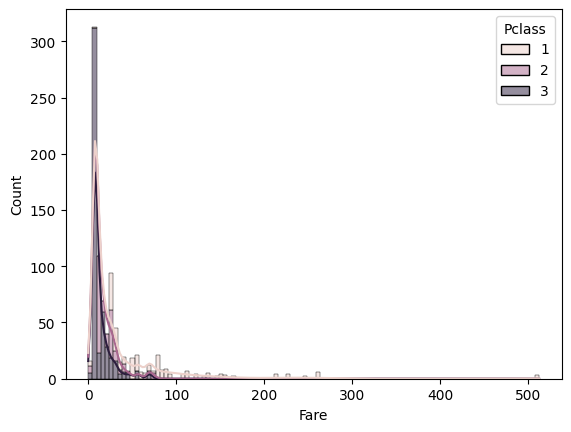

<Figure size 640x480 with 0 Axes>

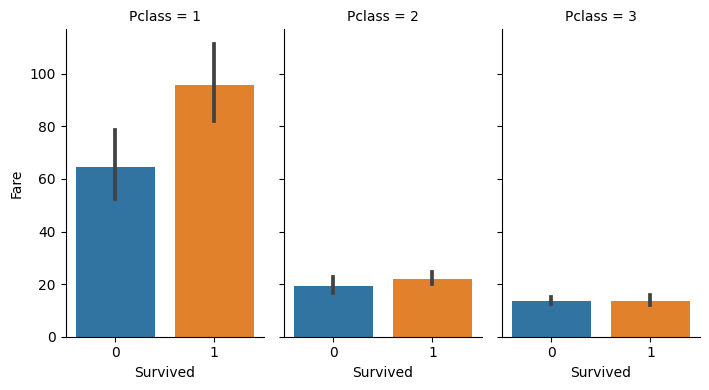

<Figure size 640x480 with 0 Axes>

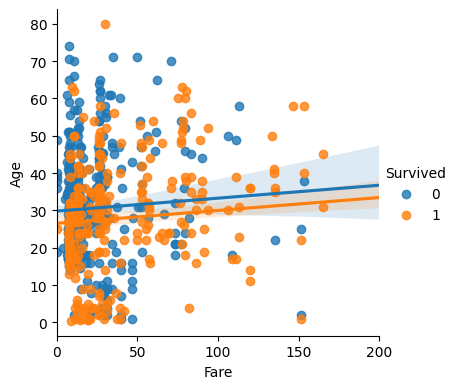

In [23]:
# Fare
plt.figure()
sns.histplot(data=df_train_orig, x='Fare',
             hue='Pclass', kde=True, multiple="stack")

plt.figure()
sns.catplot(
    data=df_train_orig, x="Survived", y="Fare", col="Pclass",
    kind="bar", height=4, aspect=.6,
)

plt.figure()
g = sns.lmplot(
    data=df_train_orig, x="Fare", y="Age", hue="Survived",
    height=4
)
g.set(xlim=(0, 200))

display(df_train_orig.groupby(['Survived', 'Pclass'])['Fare'].describe())

display(df_train_orig.groupby(['Survived', 'Sex'])['Fare'].describe())


#### Interesting observations on Embarked

People who paid more were more likely to survive.  This should have been obvious from seeing class matters.  However, even among class, at least for 1st and second, paying more did help.  Though the last scatter plot suggests the scatter is still high. 


## Build Dataset



### Clean Dataset

In [298]:
def clean_dataset(df_train, df_test, label, cats, nums, fnas, drop):

    # Change nans to the mean for numerical data
    for x in nums:
        # Needs to be fixed to use same train mean for both
        df_test[x] = df_test[x].fillna(
            df_test.groupby(fnas)[x].transform('mean'))
        df_test[x] = (df_test[x] - df_test[x].mean())/df_test[x].std()
        df_train[x] = df_train[x].fillna(
            df_train.groupby(fnas)[x].transform('mean'))
        df_train[x] = (df_train[x] - df_train[x].mean())/df_train[x].std()

    # Drop unwanted labels
    df_test = df_test.drop(columns=drop)
    df_train = df_train.drop(columns=drop)

    # Set targets for training
    y = df_train[label]
    df_train = df_train.drop(columns=label)

    # One hot encode categories
    df_test = pd.get_dummies(df_test, columns=cats, drop_first=True)
    df_train = pd.get_dummies(df_train, columns=cats, drop_first=True)

    return y, df_train, df_test


# Categorical variables to keep:
cats = ['Sex', 'Pclass', 'Embarked']

# Numerical variables to keep
nums = ['Age', 'SibSp', 'Parch', 'Fare']

# Variables to group by to fillna
fnas = ['Sex', 'Pclass']

# Labels to drop
drop = ['PassengerId', 'Cabin', 'Name', 'Ticket']

# Label for target
label = 'Survived'

# Clean data
y_clean, df_train_clean, df_test_clean = clean_dataset(
    df_train_orig, df_test_orig, label, cats, nums, fnas, drop)


# Display clean dataset
display(df_train_clean)
display(df_test_clean)
display(y_clean)


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-0.551057,0.432550,-0.473408,-0.502163,1,0,1,0,1
1,0.653662,0.432550,-0.473408,0.786404,0,0,0,0,0
2,-0.249877,-0.474279,-0.473408,-0.488580,0,0,1,0,1
3,0.427778,0.432550,-0.473408,0.420494,0,0,0,0,1
4,0.427778,-0.474279,-0.473408,-0.486064,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,-0.174582,-0.474279,-0.473408,-0.386454,1,1,0,0,1
887,-0.776942,-0.474279,-0.473408,-0.044356,0,0,0,0,1
888,-0.569881,0.432550,2.007806,-0.176164,0,0,1,0,1
889,-0.249877,-0.474279,-0.473408,-0.044356,1,0,0,0,0


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.391652,-0.498872,-0.399769,-0.496683,1,0,1,1,0
1,1.355932,0.616254,-0.399769,-0.511529,0,0,1,0,1
2,2.513068,-0.498872,-0.399769,-0.463411,1,1,0,1,0
3,-0.186916,-0.498872,-0.399769,-0.481763,1,0,1,0,1
4,-0.572629,0.616254,0.619154,-0.416860,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,-0.377836,-0.498872,-0.399769,-0.492730,1,0,1,0,1
414,0.738793,-0.498872,-0.399769,1.312915,0,0,0,0,0
415,0.700221,-0.498872,-0.399769,-0.507053,1,0,1,0,1
416,-0.377836,-0.498872,-0.399769,-0.492730,1,0,1,0,1


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Build train, validate, and test datasets

In [327]:
# Build torchified dataset from clean data
def build_torch_dataset(df_clean, y=None, pct=1.0):
    '''hey'''

    # Convert to torch
    X = torch.tensor(df_clean.values).float()
    labels = df_clean.columns

    # If training data, it should have a y
    if y is not None:

        # Convert to torch
        y = torch.tensor(y_clean.values).long()

        # Do random train/valid split
        ix = torch.randperm(X.shape[0])
        ntr = int(X.shape[0]*pct)
        itr, ival = ix[:ntr], ix[ntr:]

        # Return train valid split
        return labels, X[itr], X[ival], y[itr], y[ival]

    # If no y, return like test data
    else:
        return X


labels, Xtr, Xval, Ytr, Yval = build_torch_dataset(
    df_train_clean, y_clean, 0.8)
Xt = build_torch_dataset(df_test_clean)


'''
def test_db_func():
    # Transform X
    Xtr, Xval, Ytr, Yval = build_torch_dataset(df_train_clean.iloc[:10], y_clean.iloc[:10], 0.8)
    Xt  = build_torch_dataset(df_test_clean)
    display(df_train_clean.iloc[:10])
    display(y_clean.iloc[:10])
    display(Xtr)
    display(Ytr)
'''

# test_db_func()
# print(Xtr, Xtr.hape)
# print(Ytr, Ytr.shape)
# print(Xt, Xt.shape)
# print (Yval.shape)


## Random Forest Base

Let's use a random Forest Estimator to get a base estimate how good we should be doing.


* Random forest accuracy is: 83.32%

* The most important features are:
- Sex_male    has importance    0.1933 +/-   0.02504. Signifigant = True
- Pclass_3    has importance   0.05122 +/-   0.01205. Signifigant = True
- Age         has importance   0.03501 +/-   0.01289. Signifigant = True
- Fare        has importance  0.005173 +/-  0.008187. Signifigant = False
- SibSp       has importance  0.004905 +/-  0.003805. Signifigant = True
- Embarked_S  has importance  0.003285 +/-  0.005237. Signifigant = False
- Embarked_Q  has importance 0.0009944 +/-  0.002845. Signifigant = False
- Pclass_2    has importance -0.0003352 +/-  0.005119. Signifigant = False
- Parch       has importance -0.006682 +/-  0.004486. Signifigant = False



<AxesSubplot: >

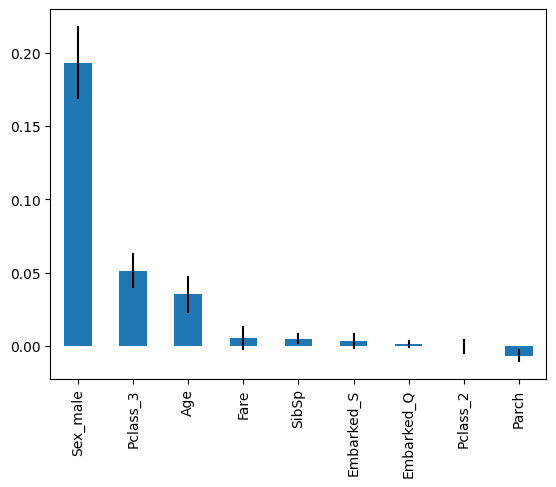

In [300]:
# Random forest model
N = 100
importances_mean = torch.zeros(N, len(labels))
stds_mean = torch.zeros(N, len(labels))
accuracy_mean = torch.zeros(N)

# Try 100 random forest models
for ii in range(N):
    model = RandomForestClassifier(
        n_estimators=100, max_depth=5, random_state=ii)
    model.fit(Xtr, Ytr)

    # Model prediction accuracy
    predictions = torch.tensor(model.predict(Xval))
    accuracy = (predictions == Yval).sum()/Yval.numel()*100
    # predictions = torch.tensor(model.predict(Xtr))
    # accuracy = (predictions == Ytr).sum()/Ytr.numel()*100

    # Plot model feature importances
    # importances = np.array(model.feature_importances_)
    result = permutation_importance(model, Xval, Yval, random_state=ii)
    # print (result.importances_mean)
    importances = result.importances_mean
    # std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    std = result.importances_std

    importances_mean[ii] = torch.tensor(importances)
    stds_mean[ii] = torch.tensor(std)
    accuracy_mean[ii] = accuracy

# Get average over 10 runs
importances = np.array(importances_mean.mean(axis=0))
std = np.array(stds_mean.mean(axis=0))
accuracy = np.array(accuracy_mean.mean(axis=0))

# Print and plot importances
print(f'\n* Random forest accuracy is: {accuracy:.2f}%')
print(f'\n* The most important features are:')
inds = importances.argsort()[::-1]
importances = importances[inds]
labels = labels[inds]
std = std[inds]
sigs = (importances - std > 0)
for i, importance in enumerate(importances):
    print(
        f'- {labels[i]:11s} has importance {importance:9.4} +/- {std[i]:9.4}. Signifigant = {sigs[i]}')
print()

model_importances = pd.Series(importances, index=labels)
model_importances.plot.bar(yerr=std)


#### Bottom line: Random Forest base gives ~80-85% accuracy

Surely there are ways to improve this, but this gives a base.  As expected, your sex and class are most important followed by age and fare paid (related to class).

## Deep Learning Models

### No hidden layer

In [472]:
# Test that you can do weights correctly
n_inputs = Xtr.shape[1]
n_outputs = 2

W = torch.randn((n_inputs, n_outputs)).float()/n_inputs**0.5

logits = (Xtr @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)


0 1.570946216583252
100 0.7352821826934814
200 0.5361083149909973
300 0.4988877475261688
400 0.49211201071739197
500 0.49055883288383484
600 0.4900771975517273
700 0.48989635705947876
800 0.48982149362564087
900 0.4897887110710144
1000 0.4897737503051758
1100 0.4897666573524475
1200 0.48976314067840576
1300 0.48976144194602966
1400 0.48976054787635803
1500 0.4897601008415222
1600 0.48975980281829834
1700 0.4897597134113312
1800 0.4897595942020416
1900 0.4897594749927521


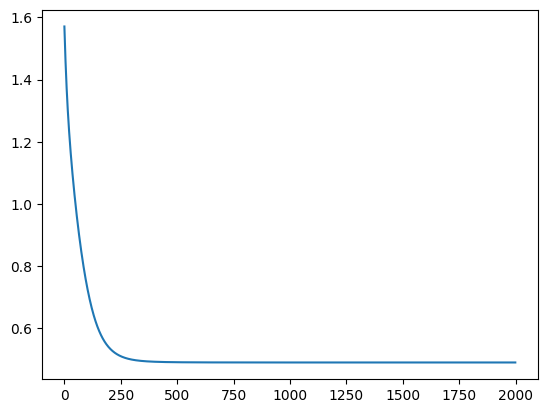

In [473]:
# The training loop
n_inputs = Xtr.shape[1]
n_outputs = 2
lossi = []

# Get random W from seed
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((n_inputs, n_outputs), generator=g, requires_grad=True)


for k in range(2000):

    # Forward pass
    logits = (Xtr @ W)  # Log counts
    counts = logits.exp()  # Like N Matrix
    # probabilities that sum to 1
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(Xtr.shape[0]), Ytr].log().mean()

    # Backward pass
    W.grad = None   # Set to zero efficently
    loss.backward()

    W.data += -0.1*W.grad

    if k % 100 == 0:
        print(k, loss.item())
    lossi.append(loss.item())

plt.plot(lossi)


In [474]:
# Feature importance

val1 = abs(W[:, 0]).detach().numpy()
val2 = abs(W[:, 1]).detach().numpy()
val3 = abs(W).mean(1).detach().numpy()
idx1 = val1.argsort()[::-1]
idx2 = val2.argsort()[::-1]
idx3 = val3.argsort()[::-1]

print (f'\n* Most important features are:')
for i in range(len(labels)):
    print(f'{labels[idx1[i]]:11s} = {val1[idx1[i]]:.2f},  {labels[idx2[i]]:11s} = {val2[idx2[i]]:.2f},  {labels[idx3[i]]:11s} = {val3[idx3[i]]:.2f}')





* Most important features are:
Fare        = 0.96,  Sex_male    = 2.54,  Sex_male    = 1.49
Age         = 0.83,  Embarked_S  = 1.34,  Pclass_2    = 0.89
Embarked_Q  = 0.70,  Pclass_2    = 1.11,  Embarked_S  = 0.89
Pclass_2    = 0.67,  Pclass_3    = 0.65,  Age         = 0.67
Parch       = 0.48,  Age         = 0.50,  Embarked_Q  = 0.53
Embarked_S  = 0.43,  Parch       = 0.36,  Fare        = 0.52
Sex_male    = 0.43,  Embarked_Q  = 0.35,  Pclass_3    = 0.46
Pclass_3    = 0.26,  SibSp       = 0.32,  Parch       = 0.42
SibSp       = 0.16,  Fare        = 0.08,  SibSp       = 0.24


In [475]:
# Test accuracy is:
for i in range(1):
    logits = (Xtr @ W)  # Log counts
    counts = logits.exp()  # Like N Matrix
    # probabilities that sum to 1
    probs = counts / counts.sum(1, keepdims=True)
    print(f'* Train accruacy is {(probs.max(1).indices == Ytr).sum()/len(Ytr)*100:.2f}')

# Validation accuracy is:
for i in range(1):
    logits = (Xval @ W)  # Log counts
    counts = logits.exp()  # Like N Matrix
    # probabilities that sum to 1
    probs = counts / counts.sum(1, keepdims=True)
    print(f'* Validation accruacy is {(probs.max(1).indices == Yval).sum()/len(Yval)*100:.2f}')


* Train accruacy is 79.35
* Validation accruacy is 79.89


In [477]:
# Test loss and accuracy are:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xval, Yval),
    }[split]

    # forward pass
    logits = (x @ W)

    loss = F.cross_entropy(logits, y)
    print(f'\n* {split:5s} loss = {loss.item():.4f}')

    counts = logits.exp()  # Like N Matrix
    probs = counts / counts.sum(1, keepdims=True)
    acc = (probs.max(1).indices == y).sum()/len(y)*100
    print(f'* {split:5s} accuracy is {acc:.2f}')



split_loss('train')
split_loss('val')


* train loss = 0.4898
* train accuracy is 79.35

* val   loss = 0.5025
* val   accuracy is 79.89


#### Bottom line for no hidden laters

* train loss = 0.4898
* train accuracy is 79.35
* val   loss = 0.5025
* val   accuracy is 79.89

### One hidden layer

In [488]:
# The Model
n_inputs = Xtr.shape[1]
n_hidden = Xtr.shape[1]
n_outputs = 2
lossi = []

# Get random W from seed
g = torch.Generator().manual_seed(2147483647)
W1 = torch.randn((n_inputs, n_hidden), generator=g)*(2.0/n_inputs)**0.5
b1 = torch.randn((n_hidden, ), generator=g)*0.01
W2 = torch.randn((n_hidden, n_outputs), generator=g)*(2.0/n_hidden)**0.5
b2 = torch.randn((n_outputs, ), generator=g)*0.01


#parameters = [C, W1, b1, W2, b2]
parameters = [W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print ("Number of params in model: ", sum(p.nelement() for p in parameters))



Number of params in model:  110


0 0.43726
1000 0.41085
2000 0.40456
3000 0.40255
4000 0.39984
5000 0.39889
6000 0.39840
7000 0.39804
8000 0.39777
9000 0.39753
10000 0.39743
11000 0.39737
12000 0.39733
13000 0.39731
14000 0.39729
15000 0.39728
16000 0.39727
17000 0.39727
18000 0.39726
19000 0.39726


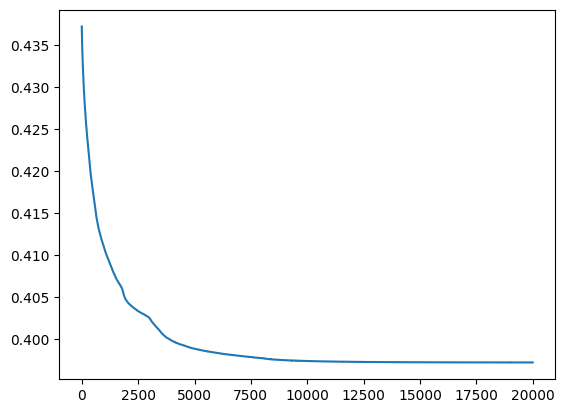

In [491]:
# Training loop
lossi = []
max_steps = 20000

for k in range(max_steps):

    # Forward pass
    h = torch.relu(Xtr @ W1 + b1)  # Log counts
    logits = h @ W2 + b2
    
    # probabilities that sum to 1
    loss = F.cross_entropy(logits, Ytr) + 0.001*torch.sum(W1**2)+ 0.001*torch.sum(W2**2)


    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update parameters
    lr = 0.1 if i < max_steps/2 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    if k % 1000 == 0:
        print(k, f'{loss.item():.5f}')
    lossi.append(loss.item())
    
plt.plot(lossi);
#plt.hist(logits.flatten().detach().numpy(),50);

#print (lossi)

In [492]:
# Test loss and accuracy are:
@torch.no_grad()
def split_loss(split):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xval, Yval),
    }[split]

    # forward pass
    h = torch.relu(x @ W1 + b1)  # Log counts
    logits = h @ W2 + b2

    loss = F.cross_entropy(logits, y)
    print(f'* {split:5s} loss = {loss.item():.4f}')

    counts = logits.exp()  # Like N Matrix
    probs = counts / counts.sum(1, keepdims=True)
    acc = (probs.max(1).indices == y).sum()/len(y)*100
    print(f'* {split:5s} accuracy is {acc:.2f}')



split_loss('train')
split_loss('val')


* train loss = 0.3752
* train accuracy is 84.13
* val   loss = 0.3899
* val   accuracy is 82.68


#### Bottom line for one hidden laters

* train loss = 0.3752
* train accuracy is 84.13
* val   loss = 0.3899
* val   accuracy is 82.68

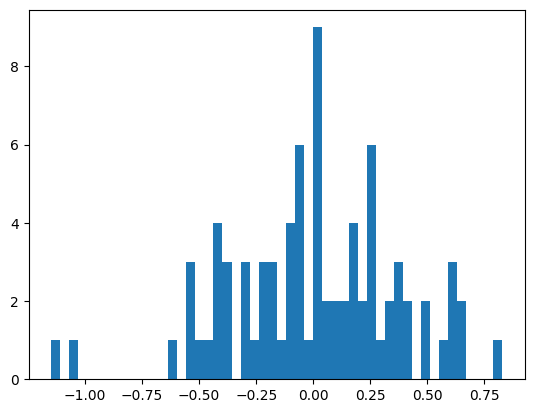

In [499]:
plt.hist(W1.flatten().detach().numpy(),50);
#plt.hist(W2.flatten().detach().numpy(),50);

torch.Size([712, 9])

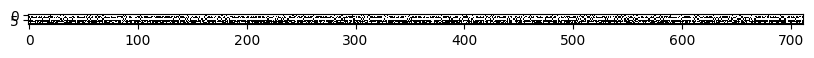

In [506]:
plt.figure(figsize=(10, 5))
plt.imshow(h.T.abs() > 0, cmap='gray', interpolation='nearest');

h.shape